# Statistical Analysis


In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
pens_df = pd.read_csv("clean_fountain_pen_dataset.csv").drop(["Unnamed: 0"],axis=1)
pens_df.head()

,url,Product_Code,Name,In_Stock,Price,Nib_Size,Brand,Color,Demonstrator,Body_Material,...,Max_Ink_Capacity_Converter,Max_Ink_Capacity_Eyedropper,Cap_Rotations,created_at,description,featured_image,images,published_at,clean_description,Series
0,https://www.gouletpens.com/collections/all-fou...,Plat-PSQ-400-01-1,Platinum Preppy Fountain Pen - Black,True,5.00,"Extra-Fine, Fine, Medium",Platinum,Black,Yes,Resin,...,0.98,4.33,NaN,2018-05-02 10:28:05-04:00,\nThe Platinum Preppy fountain pen is one of t...,//cdn.shopify.com/s/files/1/2603/2528/products...,['//cdn.shopify.com/s/files/1/2603/2528/produc...,2018-01-01 11:00:00-05:00,one best value money fantastic starter great l...,Preppy
1,https://www.gouletpens.com/collections/all-fou...,PN91111,Pilot Metropolitan Fountain Pen - Black Plain,True,23.99,"Fine, Medium, 1.0mm Stub",Pilot,Black,No,Lacquered metal,...,1.30,NaN,NaN,2018-05-02 10:28:13-04:00,"\nA fantastic value from Pilot, the Metropolit...",//cdn.shopify.com/s/files/1/2603/2528/products...,['//cdn.shopify.com/s/files/1/2603/2528/produc...,2018-01-01 11:00:00-05:00,fantastic value favorite first black metal bod...,Metropolitan
2,https://www.gouletpens.com/collections/all-fou...,TW-M7445300,TWSBI ECO Fountain Pen - Clear,True,28.99,"Extra-Fine, Fine, Medium, Broad, 1.1mm Stub",TWSBI,Clear,Yes,Resin,...,NaN,NaN,1.00,2018-05-02 10:28:24-04:00,\r\n The TW...,//cdn.shopify.com/s/files/1/2603/2528/products...,['//cdn.shopify.com/s/files/1/2603/2528/produc...,2018-01-01 11:00:00-05:00,boast incredible value piston filling system a...,ECO
3,https://www.gouletpens.com/collections/all-fou...,N15021,Noodler's Ahab Flex Fountain Pen - Clear,True,23.00,Flex,Noodler's,Clear,Yes,Resin,...,NaN,6.17,2.25,2018-05-02 10:25:05-04:00,\r\n The No...,//cdn.shopify.com/s/files/1/2603/2528/products...,['//cdn.shopify.com/s/files/1/2603/2528/produc...,2018-01-01 11:00:00-05:00,noodler 's ahab flex feature steel flexible 6 ...,Ahab Flex
4,https://www.gouletpens.com/collections/all-fou...,Plat-PSQ-400-03-1,Platinum Preppy Fountain Pen - Blue,True,4.98,"Extra-Fine, Fine, Medium",Platinum,Blue,Yes,Resin,...,0.98,4.33,NaN,2018-05-02 10:28:06-04:00,\nThe Platinum Preppy fountain pen is one of t...,//cdn.shopify.com/s/files/1/2603/2528/products...,['//cdn.shopify.com/s/files/1/2603/2528/produc...,2018-01-01 11:00:00-05:00,one best value money fantastic starter great l...,Preppy


## The relation of different numeric predictors

To check whether there is any relation between the price and other physical numeric predictors.

There is no strong correlation among price and other numeric predictors. So the physical parameters of the fountain pen may not strongly effect the price of the fountain pens

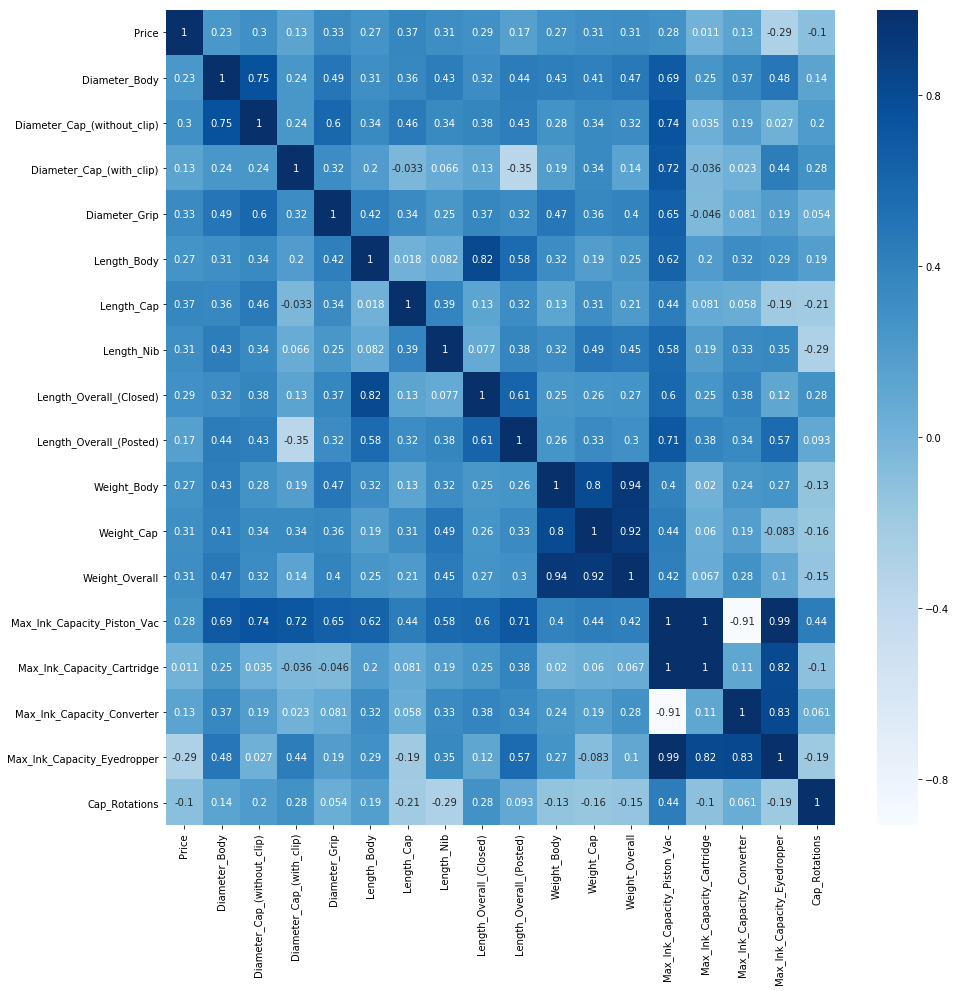

In [90]:
plt.figure(figsize=(15,15))
sns.heatmap(pens_df.corr(),annot=True,cmap=plt.cm.Blues)

## How many brand we gonna analyze

There are many brand in the fountain pen dataset.

In [91]:
brands = pd.unique(pens_df.Brand)
print(brands)
pd.unique(pens_df.Brand).shape

['Platinum' 'Pilot' 'TWSBI' "Noodler's" 'LAMY' 'Conklin' 'Jinhao' 'Kaweco'
 'Monteverde' 'Faber-Castell' 'Pelikan' 'Diplomat' 'Stipula' 'Opus 88'
 "Traveler's Company" 'Visconti' 'Montegrappa' 'ONLINE' 'Aurora' 'Edison'
 'Retro 51' 'BENU' 'Pineider' 'Esterbrook' 'Namiki' 'Nettuno']


(26,)

In [92]:
pens_df.shape[0]

655

There are 27 brands, which is acceptable compared with the size of the dataset, 655.

## The total distribution histgram of fountain pen price

To check if the plot looks approximately normal.

According to the plot, most fountain pen are no more than \$500, and the are some luxury pens too.

(array([530.,  54.,  18.,  18.,   4.,   6.,   3.,   4.,   0.,   3.,   1.,
          2.,   1.,   1.,   0.,   0.,   0.,   2.,   0.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   1.]),
 array([3.3000000e+00, 2.1323400e+02, 4.2316800e+02, 6.3310200e+02,
        8.4303600e+02, 1.0529700e+03, 1.2629040e+03, 1.4728380e+03,
        1.6827720e+03, 1.8927060e+03, 2.1026400e+03, 2.3125740e+03,
        2.5225080e+03, 2.7324420e+03, 2.9423760e+03, 3.1523100e+03,
        3.3622440e+03, 3.5721780e+03, 3.7821120e+03, 3.9920460e+03,
        4.2019800e+03, 4.4119140e+03, 4.6218480e+03, 4.8317820e+03,
        5.0417160e+03, 5.2516500e+03, 5.4615840e+03, 5.6715180e+03,
        5.8814520e+03, 6.0913860e+03, 6.3013200e+03, 6.5112540e+03,
        6.7211880e+03, 6.9311220e+03, 7.1410560e+03, 7.3509900e+03,
        7.5609240e+03, 7.7708580e+03, 7.980792

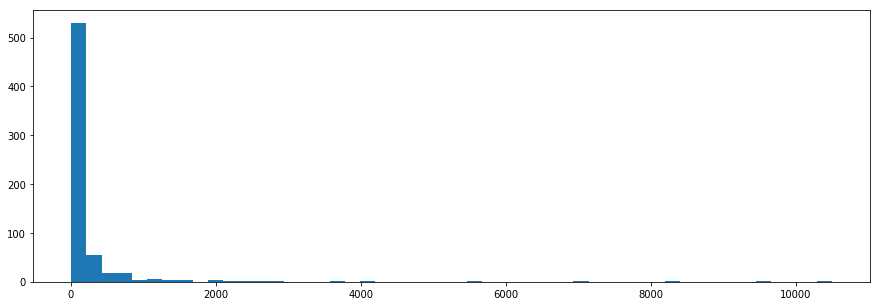

In [93]:
plt.figure(figsize=(15,5))
plt.hist(pens_df.Price,bins=2*int(np.sqrt(pens_df.shape[0])))

## The distribution boxplot of price with different brands and series

To check if there is any connection between brand and price

According to the plot, the price does relate with the brand. More precisely, it relates with the series. Some brand has relatively great variance of its price even in same series.

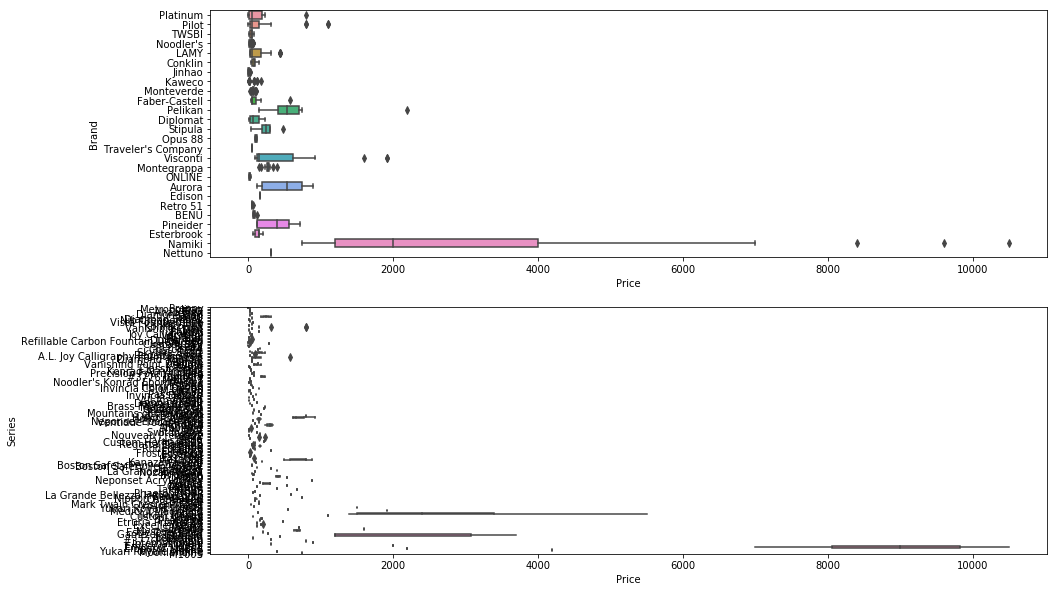

In [94]:
fig,axs = plt.subplots(2,1,figsize=(15,10))
sns.boxplot(x="Price", y="Brand", data=pens_df, orient="h",ax=axs[0])
sns.boxplot(x="Price", y="Series", data=pens_df, orient="h",ax=axs[1])

## Compare price among whether it's a demonstrator or not 

Some customers prefer demonstrators, so the price of the demonstrator tend to be a bit higher than those are not.

From the plot, the price of demonstrators are actually lower. So there should be some bias in the dataset. For example, not all the pens of same series or same brand are presented in this websit.

In [95]:
top_ten_brand = list(pens_df.Brand.value_counts()[:10].index)

(0, 350)

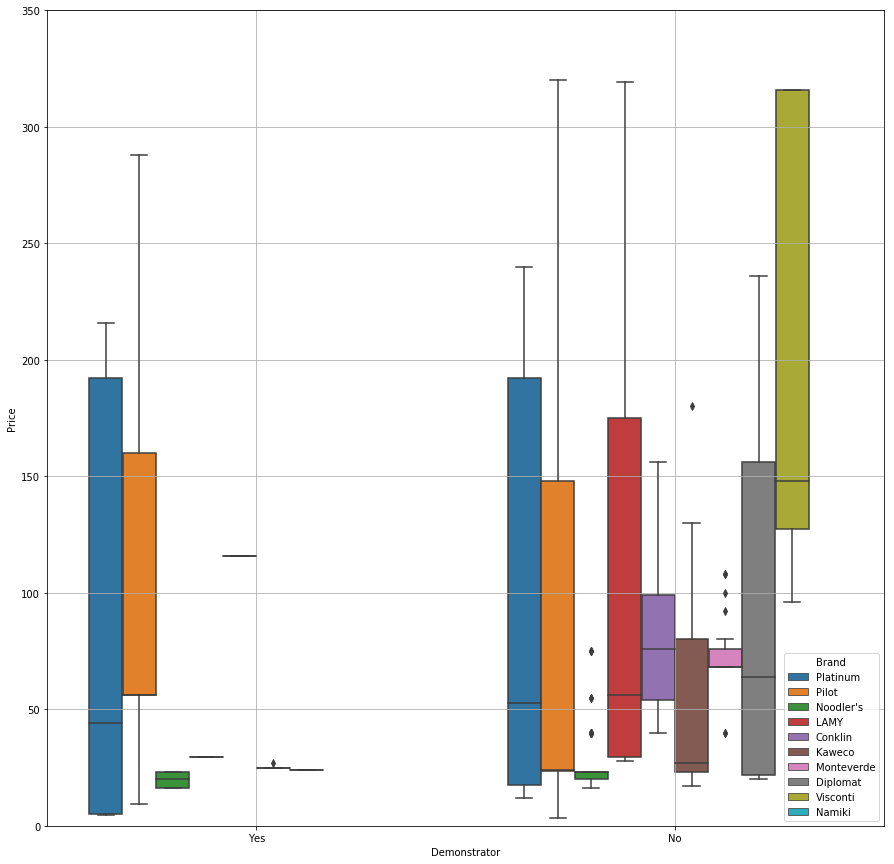

In [96]:
sub_dat = pens_df[pens_df.Brand.apply(lambda x: x in top_ten_brand)]
plt.figure(figsize=(15,15))
sns.boxplot(x="Demonstrator", y="Price",hue="Brand", data=sub_dat)
plt.grid(True)
plt.ylim(0,350)